# **Experiment 9: Handling Imbalanced Data**

### Objective:Implement techniques to handle imbalanced datasets and improve model performance.

## **Step 1: Check Class Distribution**

In [5]:
# Import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Titanic.csv')

# Check class distribution in the target column (Survived)
print("Class Distribution:")
print(df['Survived'].value_counts())  # Counts for each class


Class Distribution:
Survived
0    549
1    342
Name: count, dtype: int64


## **Step 2: Visualize Class Imbalance**

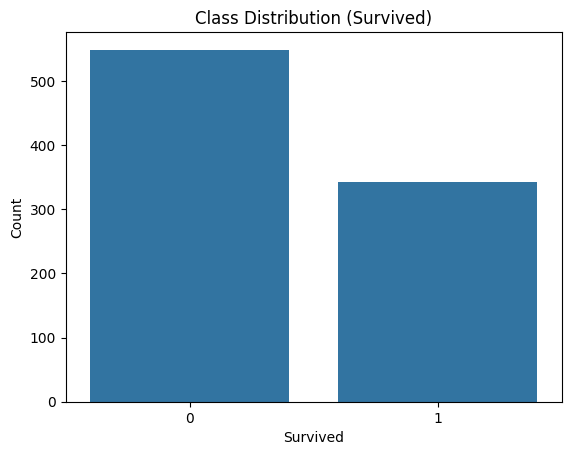

In [6]:
# Visualizing class imbalance using a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Class Distribution (Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


## **Step 3: Apply SMOTE for Oversampling**

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Preprocessing: Handle missing values and drop irrelevant columns
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=['Survived'], errors='ignore')  # Features
y = df['Survived']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution after SMOTE
print("New Class Distribution (Training Set):")
print(pd.Series(y_resampled).value_counts())


New Class Distribution (Training Set):
Survived
0    444
1    444
Name: count, dtype: int64


C:\Users\amanr\AppData\Local\Temp\ipykernel_26052\3499358364.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


## **Step 4: Visualize Resampled Data Distribution**

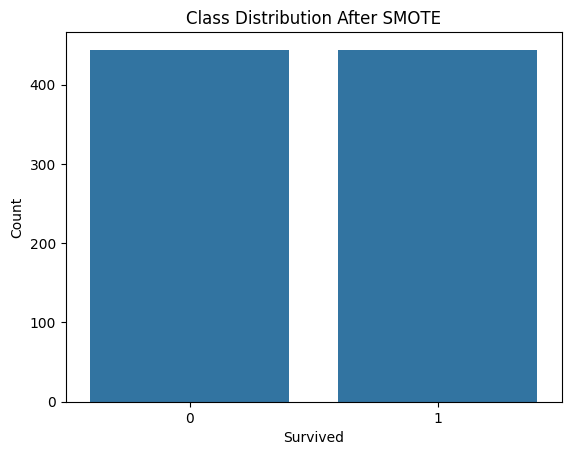

In [8]:
# Visualize the balanced class distribution after SMOTE
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
